<a href="https://colab.research.google.com/github/viniciusrpb/cic0193_machinelearning/blob/main/cap9_2_first_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 9

### 9.2. Criando Redes Neurais Convolucionais


In [38]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt

Carregando o conjunto de dados de folhas que utilizaremos como exemplo:

Link para download: https://drive.google.com/file/d/1cP75d6lJ6SLt9W4ykz9IFVThpcfo3CTZ/view?usp=sharing

### 9.2.2. Utilizando nossos próprios dados




In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!cp -r "/content/drive/My Drive/leafs" "leafs"

Deve-se considerar uma semente para garantir que os dados sejam "bagunçados" e selecionados na mesma ordem em diferentes execuções desse script.

Observe que existem três DataGenerators separados para os dados de treinamento, validação (desenvolvimento) e teste. Assim, pode-se garantir que a Data Augmentation seja executada apenas no treinamento.

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range =20,
                                   fill_mode='nearest',
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

validation_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255.)

train_set = train_datagen.flow_from_directory("leafs/train",
                                              subset='training',
                                              seed=42,
                                              target_size=(128,128),
                                              class_mode="categorical",
                                              shuffle=True,
                                              batch_size=32)

validation_set = validation_datagen.flow_from_directory("leafs/train",
                                              subset='validation',
                                              target_size=(128,128),
                                              seed=42,
                                              shuffle=True,
                                              class_mode="categorical",
                                              batch_size=32)

test_set = test_datagen.flow_from_directory("leafs/test",
                                            target_size=(128,128),
                                            class_mode="categorical",
                                            batch_size=32)

Found 160 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


In [42]:
kernel_dimensions = (5,5)
tam_strides = (1,1)
number_filters = 100
number_of_neurons = 30

num_classes = 4

In [43]:
model = Sequential()

model.add(Conv2D(filters=number_filters,padding="same",kernel_size=kernel_dimensions,input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=50,padding="same",kernel_size=kernel_dimensions))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=25,padding="same",kernel_size=kernel_dimensions))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=15,padding="same",kernel_size=kernel_dimensions))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(number_of_neurons))
model.add(Activation("relu"))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))


In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 100)     7600      
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 100)     0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 100)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 50)        125050    
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 50)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 25)       

In [45]:
sgd = SGD(learning_rate=0.1)

model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [46]:
history = model.fit(train_set,validation_data=validation_set,epochs=20)

Epoch 1/20
5/5 [==============================] - 17s 3s/step - loss: 1.3913 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 1.3878 - accuracy: 0.2438 - val_loss: 1.3913 - val_accuracy: 0.3250
Epoch 3/20
5/5 [==============================] - 13s 3s/step - loss: 1.3948 - accuracy: 0.2438 - val_loss: 1.3879 - val_accuracy: 0.2500
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 1.3893 - accuracy: 0.2250 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/20
5/5 [==============================] - 13s 3s/step - loss: 1.3876 - accuracy: 0.2438 - val_loss: 1.3854 - val_accuracy: 0.2500
Epoch 6/20
5/5 [==============================] - 13s 3s/step - loss: 1.3877 - accuracy: 0.2250 - val_loss: 1.3848 - val_accuracy: 0.2500
Epoch 7/20
5/5 [==============================] - 13s 3s/step - loss: 1.3890 - accuracy: 0.2313 - val_loss: 1.3863 - val_accuracy: 0.3250
Epoch 8/20
5/5 [==================

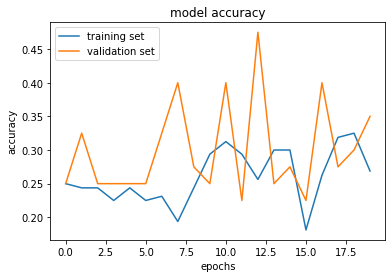

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

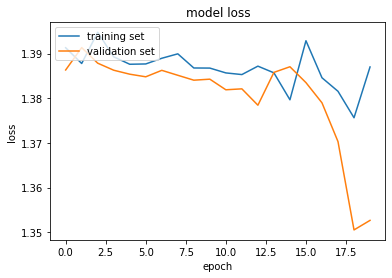

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [49]:
y_prob = model.predict(test_set)
y_pred = np.argmax(y_prob,axis=1)

print(classification_report(test_set.classes,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.12      0.19        25
           1       0.20      0.04      0.07        25
           2       0.00      0.00      0.00        25
           3       0.26      0.92      0.41        25

    accuracy                           0.27       100
   macro avg       0.22      0.27      0.17       100
weighted avg       0.22      0.27      0.17       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Jargões

Stride: pulo da evolução no processo de convolução entre uma imagem e um fitlro. O ideal é utilizarmos stride 1 ou 2 (caso a imagem seja grande). No stride 1, cada pixel da imagem é considerado na convolução, enquanto que no stride 2, o filtro é passado sobre a imagem a cada 2 pixels.

Stride horizontal Stride vertical